**Computer Vision with Tensorflow**

The goal of our convolutional neural networks is to classify and detect images or specific objects within the image. We use image data as our features and a label for these images as our label or output.


#### **Image Data**
 An image has 3 dimensions made up of:
 * Image height
 * Image width
 * Color channels

 The number of color channels represent the depth of an image and corelates to the colors used in it. For example an image with 3 channels is likely made up of rgb (red, green and blue) pixels. So for each pixel we have 3 numeric values in the range 0-255 that defines its color. For an image of color depth 1 we would likely have a grayscale image with one value defining each pixel, again in the range of 0-255.

 The same image is represented by 3 layers, i.e. the first layer tells us the reed values of the pixels, the green values and the blue values.

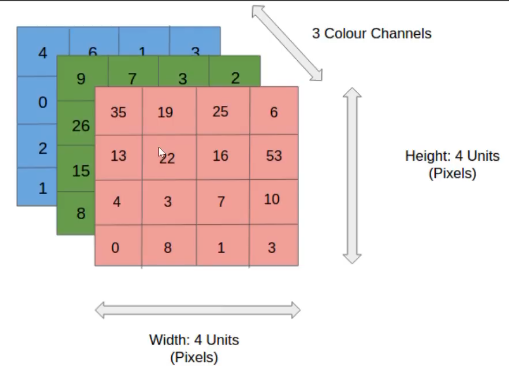

####**Convolutional Neural Network**

Each convolutional neural network is made up of one or many convolutional layers. These layers are different than the dense layers. The goal is to find the patterns that can be used to classify image or part of it.

The difference between a dense layer and a convolutional layer is that dense layers **detect patterns globally** while convolutional layers detects patterns locally. When we have a densely connected layer, each node in that layer sees all the data from the previous layer.

This means that this layer is looking at all of the information and is only capable of analyzing data at global capacity. Our convolution layer however will not be densely connected, implying it can detect local patterns using parts of the input data to that layer.






In **a dense neural network for image classification**, the model find the patterns and learns the patterns that make up the specific shapes, in specific areas.
For example in `a cat image`, if the eye exists on the left side of the screen, then that's a cat, it fails to know that if we flip the cat horizontally and the position of the cat changes, that, that is a pattern that makes up the cat. **The dense pattern looks at things globally**, looks at the entire image and learns patterns in specific areas hence we need things to be similar when we use a dense neural network to perform image classification.

**Covolutional neural network** learns **local patterns**, rather than learning that the ear exists in a specific location, it learns that this is what an ear looks like and it can find that anywhere in the image. It scans through the entire image, picks up features and find features in the image and then based on features that exist in that image, it will pass it to a dense classifier/dense neural network which looks at the presence of these features and dtermines the combination of these features that makes up the specific classes or objects


**Multiple Convolutional Layers**

It is quite common to have more than one convolution layer, i.e. 3 convolutional layers. The first layer might be responsible for picking up edges and short lines, while the 2nd layer will take as input these lines and start forming shapes or polygons, the last layer might take these shapes and determine which combinations make up a specific image.

**Feature Maps**

This term stands for a 3D tensor with 2 spacial axes (width and height) and one depth axis. Our convolutional layers take feature maps as their input and return a new feature map that represent the presence of specific filters from the previous feature map. These are what we call response maps.

###**Layer Parameters**

A convolutional layer is defined by 2 key parameters.

####**Filters**

A filter is a m x n pattern of pixels that we are looking for in an image. The number of filters in a convolutional layer represent how many patterns each layer is looking for and what depth of our response map will be. If we are looking for 32 different patterns/filters then our output feature map(the response map) will have a depth of 32. Each one of the 32 layers of depth will be a matrix of some size containing values indicating if the filter was present at that location or not.

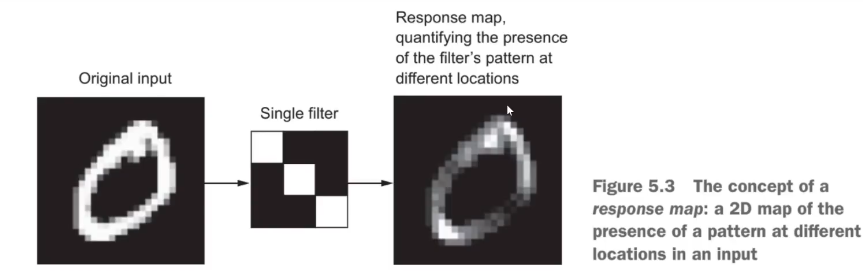

We run filter over our image, and sample the image at all the different areas, hen we create output feature map that quantifies the presence of the filter pattern at different location. We will run many different filters over our image at a time, so that we have all the diffrent feature maps telling us about the present of all the different features.

One convolutional layer will start by doing that with small simple filters such as straight lines and that other convolutional layers on top that will return out of that layer will return a map out of the layer, will take the map created from the previous layer representing e.g  the presence of diagonal lines and then looks for the edges or curves.

It looks for the presence of the  features from the previous convolutional layers and then says that when I have all these lines combined together, then that's an edge. That's why we stack the different layers.

**Convolutional layer returns a feature map that quantifies the presence of a filter at a specific location.**


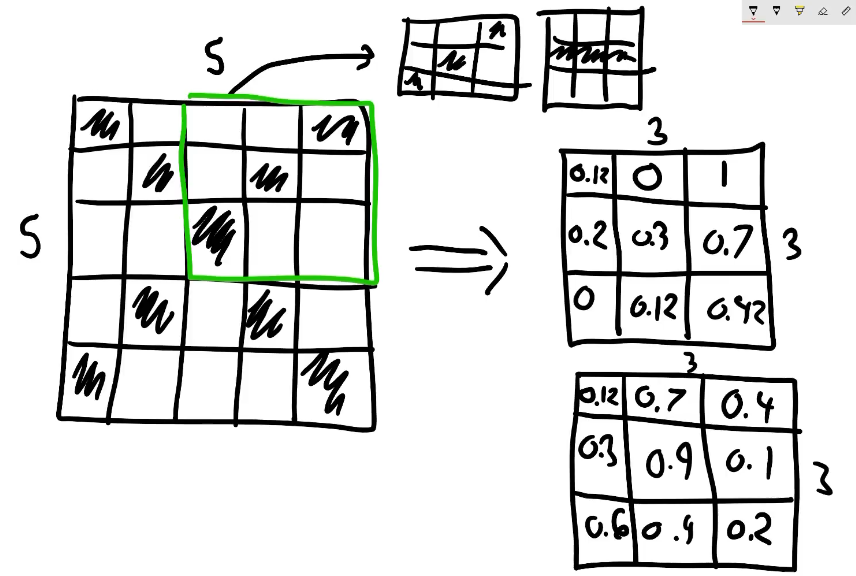

* The first convolutional layer returns to us a feature map that tells us about the presence of specific filters in this image.
* Each convolutional layer has got `input size`, `filter` and `sample filters`.
* A filter can be a diagonal line or horizontal line. The sample size is the size of the filter e.g `3x3`.
* We look at `3x3` spots in our image and look at the pixels and try to find how closely these filters match with the pixels we are looking at on each sample. The convolutional layer outputs feature map which is smaller than the original image and tells us about the presence of specific features in the areas of the image.

* If we do 2 filters, we have **a depth 2 feature map** returned to us. We take the dot product between the filter and the box in the image, and the dot product tells us how similar the 2 blocks are. If they are similar, we put a 1 and if not we put a 0.
* We get a response map from looking at 2 filters from our original image of `5 x 5`. The amount of times that this is possible i.e. `3x3` on `5x5` is `9 times.`
* We do it 64 times, '64 filters' and '32 filters' are the amount of filters that we have hence we have many layes, implying we are going to be expanding the depth of this output feature map as we move through the convolutional layers.
* This convolutional layer is mainly picking lines and edges.




####**Sample Size**

Each convolutional layer examines n x m blocks of pixels in each image. Typically we'll consider *3x3* or *5x5*. In the example above we use a `3 x 3` sample size. This size will be the same as the size of our filter. Our layers work by sliding these filters of n x m pixels over every possible position in our image and populating a new feature map/response map indicating whether the filter is pesent at each location.

#####**Borders and Padding**
Sometimes we want to ensure that the output feature map from our original image is the same dimension or the same size as the image, i.e. `5 x 5` to yield `5 x 5` and not `3 x 3`, we add padding to our original image, adding an extra row or column on each side of our image so that when we fill in all the padded pixels, so that when we do our `3 x 3` sample size, we can take a `3 x 3` sample where every single pixel is in the centre of that sample.

This allows us to generate an output map that is same size as our original input and allows us to look at features that are on edges of images that we might not be able to see before. Very useful for large images.




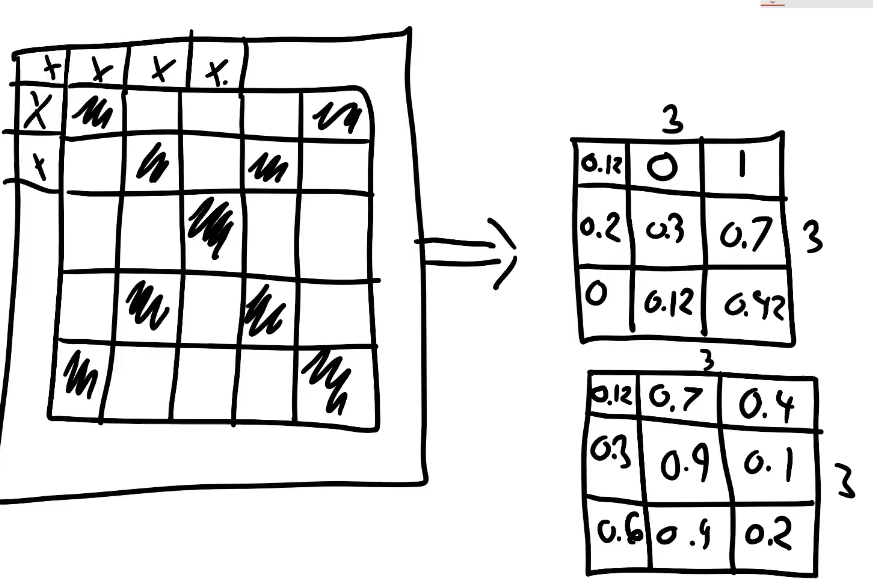

####**Strides**
Stride implies to how much we move the sample box each time in the convolutional layer i.e. 1 pixel over or 2 pixel over. The larger your stride, the smaller your output feature is, so your won't add too many or too less padding.

####**Pooling**
* Pooling means taking specific values from a sample of the output feature map. we reduce the dimensionlaity of the feature map to make it simple to work with.
* There are 3 types of pooling `min`, `max` or `average`.
* Typically we use `2x2` pooling sample size with a stride of 2. Different kind of pooling are used fro different things, the reason why we use max pooling is to tell us the maximum presence of a feature in that local area.
* `Max` tells is that feature present in that area at all, while `min` tells if that feature doesn't exist in that area which is always zero.

###**Creating a Convet**
**Dataset**
The problem will consider classifying 10 different everyday objects. The dataset we use is built in to tensorflow and called the CIFAR Image dataset, containing 60,000 color images with 6000 images of each class.

The tables in this dataset are the following:
*   Airplane
*   Automobile
* Cat
* Deer
* Dog
* Frog
* Horse
* Ship
* Truck
We'll load the dataset and have a look at some of the images below.



In [4]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [5]:
#Load and split dataset
(train_images, train_labels),(test_images,test_labels) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [6]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images/255.0, test_images/255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

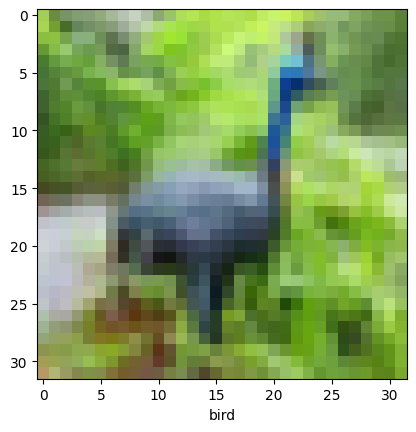

In [7]:
# Let's look at one image
IMG_INDEX =6

plt.imshow(train_images[IMG_INDEX], cmap = plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

### **CNN Architecture**
A common architecture for a CNN is a stack of Conv2D and MaxPooling2D layers followed by a few densely connected layers.

The idea is that the stack of convolutional and maxPooling layers extract the features from the image. Then the features are flattened and fed to densely connected layers that determine the class of an image based on the presence of features.

We will start by building the **Convolutional Base**.


In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (32, 32, 3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Layer 1**

The input shape of our data will be `32, 32, 3` and we will process `32 filters` of size `3 x 3`over our input data. We will also apply the activation function relu to the output of each convolution operation.

**Layer 2**

This layer will perform the max pooling operation using `2x2` samples and a stride of 2.

**Other Layers**

The next set of layers do very similar things but take as input the feature map from the previous layer. They also increase the frequency from 32 to 64. We can do this as our data shrinks in spacial dimensions as it is passed through the layers, meaning we can afford (computationally) to add more depth.

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

After looking at the summary, you note that the depth of our image increases but the spacial dimensions reduce drastically.

The summary tells us the presence of specific features as we go through this convolution base.

**A stack of convolutional and max pooling layers is called convolution base**

### **Adding Dense Layers**
* We need to pass this information in to dense layer classifier, which is going to take this pixel data that we have calculated and found(extraction of features that exist in the image) and tell us which combination of features map to either one of this 10 classes.

* The convolution base extracts all the features out of the image and then use the dense network and then say, if this combination of these features exist and that means this image is this or that.

* Now we need to take these extracted features and add a way to classify them. This is why we add the following layers to our model.

In [10]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

* We go from `4x4x64` to `1024`. Notice that is a product of `4x4x64`, then we have dense layers and outtput layer made up of 10 neurons which is a list of values and that is how we determine whichh class is predicted.

* The next layer after **convolution base** is called the **classifier**.

* We can see that the flattened layer changes the shape of our data so that we can feed it to the 64 node dense layer, followed by the final output layer of 10 neurons (one for each class).

###**Training**
Now we train and compile the model using the parameters from tensorflow.

In [ ]:
model.compile(optimizer = 'adam',
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics  = ['accuracy'])

history  = model.fit(train_images, train_labels, epochs = 4, validation_data = (test_images, test_labels))

Epoch 1/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 47ms/step - accuracy: 0.3600 - loss: 1.7211 - val_accuracy: 0.5624 - val_loss: 1.2250
Epoch 2/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 97s 57ms/step - accuracy: 0.5911 - loss: 1.1617 - val_accuracy: 0.6203 - val_loss: 1.0825
Epoch 3/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 57ms/step - accuracy: 0.6546 - loss: 0.9887 - val_accuracy: 0.6585 - val_loss: 0.9593
Epoch 4/4


### **Evaluating the Model**
We can determine how well the model performed by looking at it's performance on the test dataset.

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print(test_acc)

We get 66% accuracy which isn't bad for a simple model like this but we'll dive into some better approaches for computer vision.

### **Working with Small Datasets**
In the situation where you don't have millions of images, it is difficult to train a CNN from scratch that performs very well. This is why we will learn a few techniques we can use to train CNN's on small datasets on a few 1000 images.

**Data Augmentation**

* If you have one image, you can turn this into several different images, and pass all those images to our model, so we rotate the image, stretch it, compress it, shift and zoom it and pass it to our model, it should be better at **generalizing** because it was the same image but modified and **augmented several times**.



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array # Import img_to_array


# creates a data generator object tjat transforms images
datagen  =ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range  = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

# pick an image to transform
test_img = train_images[20]
img = img_to_array(test_img) #convert image to numpy array
img = img.reshape((1,) + img.shape) # reshape image

i = 0

for batch in datagen.flow(img, save_prefix = 'test', save_format = 'jpeg'): # this loop runs forever until we break, saving images to current directory
    plt.figure(i)
    plot = plt.imshow(batch[0])
    i+= 1
    if i>4: # show 4 images
        break
plt.show()

* The script does data augmentation by using the ImageDataGenerator from the tensorflow.keras.preprocessing.image module.

* We create ImageDataGenerator object, it specifies the parameters of how we want to modify our image, shift.

* Pick one arbitrary image from test_image dataset, convert that to an image array, reshape it.

* datagen.flow take the image, save the image as test.jpeg(test1,test2.test3,...) until it breaks.





### **Pretrained Models**

* What if even after data augmentation, we still don't have enough images in our dataset, then we use a CNN already trained on some 1.4 million images or so and we use part of that model as the base of our model/starting point.
*  All we need to do is fine tune the last few layers of that network so that they work better for our purposes. The beginning of that model is what is picking up on smaller edges and the very general things that appear in all of our images.We use the beginning of that model that picks on general things that applies to images, then we change the top layers and add our own layers to classify for the problem that we want.

* This method improves on the accuracy of the model. CNN alone (with no dense layers) just map the presence of features from our input. This means that we can use a pretrained CNN, one trained on millions of images as the start of our model.This will allow us to have a very good convolution base before adding our own dense classifier at the end. technique allows to train a very good classifier for a small dataset (10,000 images).

* This is because the convnet has a very good idea of what features to look for an image and can find them very effectively. So if we can determine the presence of features, then the rest of the model needs to determine which combination of features makes a specific image.

###**Fine Tuning**
* This means tweaking the final layers in our convolutional base to work better for our specific problem. This involves not touching or retraining the earlier layers in our convolutional base but only adjusting the final few.
* We do this because the first layers in our base are good at extracting low level features like lines and edges, things that are similar for any kind of image where the layers are good at picking up very specific features like shapes. If we adjust the final layers, then we look for only features relevant to our specific problem.

###**Using a Pretrained Model**
We use a pretrained modeland fine tuning to classify images of dogs and cats using a fairly small dataset.

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
keras = tf.keras

**Dataset**

We load the cats_vs_dogs dataset from the module tensorflow_datasets. The dataset contains (image, label) pairs where images have diffrent dimensions and 3 color channels.

In [ ]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# split the data manually into 80% training, 10% testing, 10% validation.
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'cats_vs_dogs',
    split = ['train[:80%]', 'train[80%:90%]','train[90%:]'],
    with_info = True,
    as_supervised = True
)

get_label_name = metadata.features['label'].int2str # creates a function object that we can use to get labels

# display 2 images from the dataset
for image, label in raw_train.take(5):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

In [ ]:
IMG_SIZE = 160 # All images will be resized to 160 x 160

def format_example(image, label):
  """
  returns an image that is reshaped to IMG_SIZE
  """

  image = tf.cast(image, tf.float32)
  image = (image/127.5)-1
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  return image, label

#Now we can apply this function to all our images using map
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

#Let's have a look at our images now.
for image, label in train.take(5):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

* It is better always when resizing to make the image smaller rather than bigger, but also don't go too small. Bigger images tend to stretch most of the examples which might loose the details.
* The function takes an image and a label, it then cast/convert every single pixel in our image to a float 32 value, we then divide that by 127.5 which is 1/2 of 255 and then substract 1.
* Then we apply it to every single image using the map function to resize all the images to `160 x 160`.

Now if we look at the shape of an original image vs the new image we will see it has changed.

In [ ]:
for img, label in raw_train.take(2):
  print("Original shape:", img.shape)

for img, label in train.take(2):
  print("New shape:", img.shape)

### **Picking a Pretrained Model**
The model we are going to use as the convolutional base for our model is the **MobileNet V2** developed at Google. The model is trained on 1.4 million images and has 1000 different classes.

We want to use this model but only its convolutional base. So when we load in the model we'll specify that we don't want to load the top (classification) layer. We'll tell the model what input shape to expect and to use the predetermined weights from imagenet (Google dataset)

In [ ]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape = IMG_SHAPE,
                                               include_top = False,
                                               weights = 'imagenet')

* We first define the input shape. `include_top` means do we include the classifier that comes with this network already, for our case we are retraining parts of this network so that it works specifically for dogs and cats and not for `1000` different classes, which is what this model was trained to do, hence won't include the top(classifier)

* We load the weights from the `imagenet`.

In [ ]:
base_model.summary()

* At this point this `base_model` will simply output a shape (32,5,5,1280) tensor that is feature extraction from our original(1, 160,160, 3) image. The 32 means that we have 32 layers of different filters/features.

* We take (None, 5, 5, 1280) and using this information pass that to some more convolutional layers and our classifier and use that to predict dogs and cats.

In [ ]:
train_batches = train.batch(32)
for image, _ in train_batches.take(1):

        pass

feature_batch = base_model(image)
print(feature_batch.shape)


### **Freezing the Base**
The term freezing refers to disabling the training property of a layer. It simply means we wont make any changes to weights of any layers that are frozen during training. This is important as we don't want to change the convolutional base that already has learned weights.

In [ ]:
base_model.trainable = False
base_model.summary()

The trainable parameters is now zero, we now take that and use it classify either cat, either dog.

###**Adding our Classifier**
Now that we have our base layer setup, we can add the classifier. Instead of flattening he feature map of the base layer, we will use a global average pooling layer that will average the entire `5 x 5` area of each 2D feature map and return to us a single 1280 element vector per filter.

We add `a global_average_layer` which is going to take the entire average of 1200 different layers that are `5 x 5` and put them in to a `1D tensor`.

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

Finally we will add the prediction layer that will be a single dense neuron. We can do this because we only have two classes to predict for.

In [ ]:
prediction_layer = keras.layers.Dense(1)

We now combine these layers together in a model.

In [ ]:
model = tf.keras.Sequential([
    base_model,
    global_average_layer,
    prediction_layer
])


In [ ]:
model.summary()

### **Training the model**

Now we will train and compile the model, we will use a very small learning rate to ensure that the model does not have any major changes. The learning rate means how much am I

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate), # Changed 'lr' to 'learning_rate'
              loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics = ['Accuracy'])

In [ ]:
# We can evaluate the model to see how it does before training it on our images
initial_epochs = 3
validation_steps = 20

loss0, accuracy0 = model.evaluate(validation_batches, steps = validation_steps)

In [ ]:
## Now we can train it on our images
history = model.fit(train_batches,
                    epochs = initial_epochs,
                    validation_data = validation_batches)

acc  = history.history['accuracy']
print(acc)

store the model after prediction to avoid retraining since the model takes more than an 1 hr.

In [ ]:
model.save("dogs_vs_cats.h5")
new_model = tf.keras.models.load_model('dogs_vs_cats.h5')

##Then use model.predict to predict new values.

### **Object Detection**